<center><h2><b>CS5352: Advanced Operaitng System</b></h2></center>
<center><h2>Project: Binary Search Tree VS Avl Search Tree</h2></center>
<div style="text-align: right">Name: Subhakari Mounika Gandham</div>
<div style="text-align: right">R Number: R11789255</div>

<center><h3 style="color:MediumSeaGreen;">ALGORITHM FOR BINARY SEARCH TREE</h3></center>

In [127]:


class BstNode:
    
    def __init__(self, bstNodeData, bstParentNode):
        self.bstNodeData = bstNodeData
        self.bstLeftNode = None
        self.bstRightNode = None
        self.bstParentNode = bstParentNode


class BinarySearchTree:
    
    def __init__(self):
        self.bstRootNode =  None
    
    def bstInsert(self, bstNodeData):
        if not self.bstRootNode:
            self.bstRootNode = BstNode(bstNodeData, None)
        else:
            self.bstInsertSub(bstNodeData, self.bstRootNode)
    
    def bstInsertSub(self, bstNodeData, bstNode):
        
        if bstNodeData < bstNode.bstNodeData:
            if bstNode.bstLeftNode:
                self.bstInsertSub(bstNodeData, bstNode.bstLeftNode)
            else:
                bstNode.bstLeftNode = BstNode(bstNodeData, bstNode)
        else:
            if bstNode.bstRightNode:
                self.bstInsertSub(bstNodeData, bstNode.bstRightNode)
            else:
                bstNode.bstRightNode = BstNode(bstNodeData, bstNode)
    
    def bstTraverseInOrder(self):
        
        if self.bstRootNode is not None:
            self.bstTraverseInOrderSub(self.bstRootNode)
    

        
    def bstTraverseInOrderSub(self, bstNode):
        
        if bstNode.bstLeftNode:
            self.bstTraverseInOrderSub(bstNode.bstLeftNode)
        
#         print("%s" % bstNode.bstNodeData)
        
        if bstNode.bstRightNode:
            self.bstTraverseInOrderSub(bstNode.bstRightNode)
    
    
    def bstRemove(self, bstNodeData):
        
        if self.bstRootNode is not None:
            self.bstRemoveSub(bstNodeData, self.bstRootNode)
    
    def bstRemoveSub(self, bstNodeData, bstNode):
        
        if bstNode is None:
            return
        
        if bstNodeData < bstNode.bstNodeData:
            self.bstremoveSub(bstNodeData, bstNode.bstLeftNode)
        
        elif bstNodeData > bstNode.bstNodeData:
            self.bstRemoveSub(bstNodeData, bstNode.bstRightNode)
        
        else:
            
            if bstNode.bstLeftNode is None and bstNode.bstRightNode  is None:
#                 print("removing the leaf node %d" % bstNode.bstNodeData)
                
                bstParentNode = bstNode.bstParentNode
                
                if bstParentNode is not None and bstParentNode.bstLeftNode == bstNode:
                    bstParentNode.bstLeftNode = None
                if bstParentNode is not None and bstParentNode.bstRightNode == bstNode:
                    bstParentNode.bstRightNode = None
                if bstParentNode is None:
                    self.bstRootNode = None
                
                del bstNode
            
            elif bstNode.bstLeftNode is not None and bstNode.bstRightNode is None:
                
                bstParentNode = bstNode.bstParentNode
                
                if bstParentNode is not None:
                    if bstParentNode.bstLeftNode == bstNode:
                        bstParentNode.bstLeftNode = bstNode.bstLeftNode
                    if bstParentNode.bstRightNode == bstNode:
                        bstParentNode.bstRightNode = bstNode.bstLeftNode
                else:
                    self.bstRootNode = bstNode.bstleftNode
                
                bstNode.bstLeftNode.bstParentNode = bstParentNode
                
                del bstNode
                
            elif bstNode.bstLeftNode is None and bstNode.bstRightNode is not None:
                
                bstParentNode = bstNode.bstParentNode
                
                if bstParentNode is not None:
                    if bstParentNode.bstLeftNode == bstNode:
                        bstParentNode.bstLeftNode = bstNode.bstRightNode
                    if bstParentNode.bstRightNode == bstNode:
                        bstParentNode.bstRightNode = bstNode.bstRightNode
                else:
                    self.bstRootNode = bstParentNode.bstRightNode
                
                bstNode.bstRightNode.bstParentNode = bstParentNode
                
                del bstNode
            
            else:
                
#                 print("removing node with two children")
                
                bstPredecessor = self.getBstPredecessor(bstNode.bstLeftNode)
                
                temp = bstPredecessor.bstNodeData
                bstPredecessor.bstNodeData = bstNode.bstNodeData
                bstNode.bstNodeData = temp
                
                self.bstRemove(bstNodeData, bstPredecessor)
    
    
    def getBstPredecessor(self, bstNode):
        
        if bstNode.bstNodeRight:
            return self.getBstPredecessor(bstNode.bstNodeRight)
        
        return bstNode
    



<center><h3 style="color:MediumSeaGreen;">ALGORITHM FOR AVL SEARCH TREE</h3></center>

In [128]:
import sys

# Create a tree node
class TreeNode(object):
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1


class AVLTree(object):

    # Function to insert a node
    def insert_node(self, root, key):

        # Find the correct location and insert the node
        if not root:
            return TreeNode(key)
        elif key < root.key:
            root.left = self.insert_node(root.left, key)
        else:
            root.right = self.insert_node(root.right, key)

        root.height = 1 + max(self.getHeight(root.left),
                              self.getHeight(root.right))

        # Update the balance factor and balance the tree
        balanceFactor = self.getBalance(root)
        if balanceFactor > 1:
            if key < root.left.key:
                return self.rightRotate(root)
            else:
                root.left = self.leftRotate(root.left)
                return self.rightRotate(root)

        if balanceFactor < -1:
            if key > root.right.key:
                return self.leftRotate(root)
            else:
                root.right = self.rightRotate(root.right)
                return self.leftRotate(root)

        return root

    # Function to delete a node
    def delete_node(self, root, key):

        # Find the node to be deleted and remove it
        if not root:
            return root
        elif key < root.key:
            root.left = self.delete_node(root.left, key)
        elif key > root.key:
            root.right = self.delete_node(root.right, key)
        else:
            if root.left is None:
                temp = root.right
                root = None
                return temp
            elif root.right is None:
                temp = root.left
                root = None
                return temp
            temp = self.getMinValueNode(root.right)
            root.key = temp.key
            root.right = self.delete_node(root.right,
                                          temp.key)
        if root is None:
            return root

        # Update the balance factor of nodes
        root.height = 1 + max(self.getHeight(root.left),
                              self.getHeight(root.right))

        balanceFactor = self.getBalance(root)

        # Balance the tree
        if balanceFactor > 1:
            if self.getBalance(root.left) >= 0:
                return self.rightRotate(root)
            else:
                root.left = self.leftRotate(root.left)
                return self.rightRotate(root)
        if balanceFactor < -1:
            if self.getBalance(root.right) <= 0:
                return self.leftRotate(root)
            else:
                root.right = self.rightRotate(root.right)
                return self.leftRotate(root)
        return root

    # Function to perform left rotation
    def leftRotate(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
        return y

    # Function to perform right rotation
    def rightRotate(self, z):
        y = z.left
        T3 = y.right
        y.right = z
        z.left = T3
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
        return y

    # Get the height of the node
    def getHeight(self, root):
        if not root:
            return 0
        return root.height

    # Get balance factore of the node
    def getBalance(self, root):
        if not root:
            return 0
        return self.getHeight(root.left) - self.getHeight(root.right)

    def getMinValueNode(self, root):
        if root is None or root.left is None:
            return root
        return self.getMinValueNode(root.left)

    def inOrder(self, root):
        if not root:
            return
        self.inOrder(root.left)
#         print("{0} ".format(root.key), end="")
        self.inOrder(root.right)
    



<center><h3 style="color:MediumSeaGreen;">EVALUATION PROCEDURE FOR BINARY SEARCH TREE ALGORITHM</h3></center>

In [129]:

def BstEvaluation(input_list): 
    
    bst = BinarySearchTree() 
    for i in input_list:
        bst.bstInsert(i)
    bst.bstTraverseInOrder()

<center><h3 style="color:MediumSeaGreen;">EVALUATION PROCEDURE FOR AVL SEARCH TREE</h3></center>

In [130]:

def AvlEvaluation(input_list): 
    
    avl = AVLTree()
    root = None
    for i in input_list:
        root = avl.insert_node(root,i)
    avl.inOrder(root)

    


<center><h3 style="color:MediumSeaGreen;">METRICS GENERATION PROCEDURE</h3></center>
<p style="color:MediumSeaGreen;" > <b>
 1.    CPU USAGE <br> 
 2.    MEMORY USAGE  <br>
 3.    HARD DRIVE USAGE <br>
 4.    RSS <br>
 5.    VMS <br>
 6.    NUMBER OF PAGE FAULTS
</p>

In [131]:
import psutil
import os
def EvaluationMetrics():
    procId = psutil.Process(os.getpid())
#     print("pid is " , procId)
    cpu_percent = psutil.cpu_percent(interval=1, percpu=True)
    ##load1,load5,load15 = psutil.getloadavg()
    ##cpu_usage1 = (load15/os.cpu_count()) * 100
    ##print("CPU Usage1" , cpu_usage1)
    memory_usage = procId.memory_percent()
    disk_usage =psutil.disk_usage('/')
    rss = procId.memory_full_info().rss
    vms = procId.memory_full_info().vms
    page_faults = procId.memory_full_info().num_page_faults
    disk_percent = psutil.disk_usage('/').percent
    return [sum(cpu_percent)/len(cpu_percent),memory_usage,disk_usage,rss,vms,page_faults,disk_percent]

<center><h3 style="color:MediumSeaGreen;">BST GENERATION PROCESS , AVL GENERATION PROCESS , CONCURRENT PROCESS </h3></center>


In [132]:
import multiprocessing
import random
import time

inputs = [100,1000,5000,10000]
Bst_Execution_Time=[]
Avl_Execution_Time=[]
Both_Execution_Time = []

Both_cpu =[]
Both_memory=[]
Both_disk = []
Both_disk_percent = []
Both_rss =[]
Both_vms = []
Both_faults = []
Both_Metric = []

Bst_cpu =[]
Bst_memory=[]
Bst_disk = []
Bst_disk_percent = []
Bst_rss =[]
Bst_vms = []
Bst_faults = []
Bst_Metric = []

Avl_cpu =[]
Avl_memory=[]
Avl_disk = []
Avl_disk_percent = []
Avl_rss =[]
Avl_vms = []
Avl_faults = []
Avl_Metric =[]



input_list=[]
for inp in inputs: 
#     for i in range(0,inp):
#         x = random.randint(0,2000000)
#         input_list.append(x)
    input_list = random.sample(range(1, 2000000), inp)
    start_time = time.time()
    BstEvaluation(input_list)
    end_time = time.time()
    Bst_Execution_Time.append(round((end_time - start_time),4))
    Bst_Metric = EvaluationMetrics()
    Bst_cpu.append(round(Bst_Metric[0],4))
    Bst_memory.append(round(Bst_Metric[1],4))
    Bst_disk.append(Bst_Metric[2])
    Bst_rss.append(Bst_Metric[3])
    Bst_vms.append(Bst_Metric[4])
    Bst_faults.append(Bst_Metric[5])
    Bst_disk_percent.append(Bst_Metric[6])
    
    start_time = time.time()
    AvlEvaluation(input_list)
    end_time = time.time()
    Avl_Execution_Time.append(round((end_time - start_time),4))
    Avl_Metric = EvaluationMetrics()
    Avl_cpu.append(round(Avl_Metric[0],4))
    Avl_memory.append(round(Avl_Metric[1],4))
    Avl_disk.append(Avl_Metric[2])
    Avl_rss.append(Avl_Metric[3])
    Avl_vms.append(Avl_Metric[4])
    Avl_faults.append(Avl_Metric[5])
    Avl_disk_percent.append(Avl_Metric[6])
    
    p1 = multiprocessing.Process(target = BstEvaluation,args=(input_list, ))
    p2 = multiprocessing.Process(target= AvlEvaluation, args=(input_list, ))
    
    start_time = time.time()
    p1.start()
    p2.start()
    p1.join()
    p2.join()
    end_time = time.time()
    Both_Execution_Time.append(round((end_time - start_time),4))
    Both_Metric = EvaluationMetrics()
    Both_cpu.append(round(Both_Metric[0],4))
    Both_memory.append(round(Both_Metric[1],4))
    Both_disk.append(Both_Metric[2])
    Both_rss.append(Both_Metric[3])
    Both_vms.append(Both_Metric[4])
    Both_faults.append(Both_Metric[5])
    Both_disk_percent.append(Both_Metric[6])
    
    
# print(Bst_Execution_Time)
# print(Avl_Execution_Time)
# print(Both_Execution_Time)



<center><h3 style="color:MediumSeaGreen;">METRICS DISPLAY FOR BINARY SEARCH TREE</h3></center> 

In [133]:

print("Evalution metrics for Binary Search Tree Algorithm")
print("**************************************************")
print("EXECUTION TIMES")
print("CPU USAGE")
print("MEMORY USAGE")
print("DISK USAGE")
print("RSS")
print("VMS")
print("PAGE FAULTS")
print("**************************************************")
print()

for inp in range(len(Bst_Execution_Time)):
    print("Execution Time for input" , inputs[inp] , ": ", Bst_Execution_Time[inp])
    print("-----------------------------------------------------------------------------------------------------------")

print()

for inp in range(len(Bst_cpu)):
    print("Cpu Usage for input" ,inputs[inp] , ":  ", Bst_cpu[inp])
    print("-----------------------------------------------------------------------------------------------------------")


print()

for inp in range(len(Bst_memory)):
    print("Memory usage for input", inputs[inp], ":  ", Bst_memory[inp])
    print("-----------------------------------------------------------------------------------------------------------")

    
print()

for inp in range(len(Bst_disk)):
    print("Disk usage for input", inputs[inp], ":  ", Bst_disk[inp])
    print("-----------------------------------------------------------------------------------------------------------")

    
print()

for inp in range(len(Bst_rss)):
    print("RSS for input", inputs[inp], ":  ", Bst_rss[inp])
    print("-----------------------------------------------------------------------------------------------------------")

    
print()

for inp in range(len(Bst_vms)):
    print("VMS for input", inputs[inp], ":  ", Bst_vms[inp])
    print("-----------------------------------------------------------------------------------------------------------")

print()

for inp in range(len(Bst_faults)):
    print("Page Faults for input", inputs[inp], ":  ", Bst_faults[inp])
    print("-----------------------------------------------------------------------------------------------------------")



Evalution metrics for Binary Search Tree Algorithm
**************************************************
EXECUTION TIMES
CPU USAGE
MEMORY USAGE
DISK USAGE
RSS
VMS
PAGE FAULTS
**************************************************

Execution Time for input 100 :  0.0
-----------------------------------------------------------------------------------------------------------
Execution Time for input 1000 :  0.005
-----------------------------------------------------------------------------------------------------------
Execution Time for input 5000 :  0.032
-----------------------------------------------------------------------------------------------------------
Execution Time for input 10000 :  0.067
-----------------------------------------------------------------------------------------------------------

Cpu Usage for input 100 :   23.2
-----------------------------------------------------------------------------------------------------------
Cpu Usage for input 1000 :   4.625
-------------

<center><h3 style="color:MediumSeaGreen;">METRICS DISPLAY FOR AVL SEARCH TREE</h3></center> 

In [134]:

print("Evalution metrics for AVL Tree Algorithm")
print("**************************************************")
print("EXECUTION TIMES")
print("CPU USAGE")
print("MEMORY USAGE")
print("DISK USAGE")
print("RSS")
print("VMS")
print("PAGE FAULTS")
print("**************************************************")
print()

for inp in range(len(Avl_Execution_Time)):
    print("Execution Time for input" , inputs[inp] , ": ", Avl_Execution_Time[inp])
    print("-----------------------------------------------------------------------------------------------------------")

print()    
    
for inp in range(len(Avl_cpu)):
    print("Cpu Usage for input" ,inputs[inp] , ":  ", Avl_cpu[inp])
    print("-----------------------------------------------------------------------------------------------------------")

print()

for inp in range(len(Avl_memory)):
    print("Memory usage for input", inputs[inp], ":  ", Avl_memory[inp])
    print("-----------------------------------------------------------------------------------------------------------")

    
print()

for inp in range(len(Avl_disk)):
    print("Disk usage for input", inputs[inp], ":  ", Avl_disk[inp])
    print("-----------------------------------------------------------------------------------------------------------")

    
print()

for inp in range(len(Avl_rss)):
    print("RSS for input", inputs[inp], ":  ", Avl_rss[inp])
    print("-----------------------------------------------------------------------------------------------------------")

    
print()

for inp in range(len(Avl_vms)):
    print("VMS for input", inputs[inp], ":  ", Avl_vms[inp])
    print("-----------------------------------------------------------------------------------------------------------")


print()

for inp in range(len(Avl_faults)):
    print("Page Faults for input", inputs[inp], ":  ", Avl_faults[inp])
    print("-----------------------------------------------------------------------------------------------------------")




Evalution metrics for AVL Tree Algorithm
**************************************************
EXECUTION TIMES
CPU USAGE
MEMORY USAGE
DISK USAGE
RSS
VMS
PAGE FAULTS
**************************************************

Execution Time for input 100 :  0.004
-----------------------------------------------------------------------------------------------------------
Execution Time for input 1000 :  0.017
-----------------------------------------------------------------------------------------------------------
Execution Time for input 5000 :  0.2979
-----------------------------------------------------------------------------------------------------------
Execution Time for input 10000 :  0.2308
-----------------------------------------------------------------------------------------------------------

Cpu Usage for input 100 :   28.225
-----------------------------------------------------------------------------------------------------------
Cpu Usage for input 1000 :   11.4
------------------

<center><h3 style="color:MediumSeaGreen;">METRICS DISPLAY FOR CONCURRENT PROCESS</h3></center> 

In [135]:

print("Evalution metrics for Both Algorithms , concurrent processes")
print("**************************************************")
print("EXECUTION TIMES")
print("CPU USAGE")
print("MEMORY USAGE")
print("DISK USAGE")
print("RSS")
print("VMS")
print("PAGE FAULTS")
print("**************************************************")
print()

for inp in range(len(Both_cpu)):
    print("Execution Times  for input" ,inputs[inp] , ":  ", Both_Execution_Time[inp])
    print("-----------------------------------------------------------------------------------------------------------")

print()

for inp in range(len(Both_cpu)):
    print("Cpu Usage for input" ,inputs[inp] , ":  ", Both_cpu[inp])
    print("-----------------------------------------------------------------------------------------------------------")


print()

for inp in range(len(Both_memory)):
    print("Memory usage for input", inputs[inp], ":  ", Both_memory[inp])
    print("-----------------------------------------------------------------------------------------------------------")

    
print()

for inp in range(len(Both_disk)):
    print("Disk usage for input", inputs[inp], ":  ", Both_disk[inp])
    print("-----------------------------------------------------------------------------------------------------------")

    
print()

for inp in range(len(Both_rss)):
    print("RSS for input", inputs[inp], ":  ", Both_rss[inp])
    print("-----------------------------------------------------------------------------------------------------------")

    
print()

for inp in range(len(Both_vms)):
    print("VMS for input", inputs[inp], ":  ", Both_vms[inp])
    print("-----------------------------------------------------------------------------------------------------------")


print()

for inp in range(len(Both_faults)):
    print("Page Faults for input", inputs[inp], ":  ", Both_faults[inp])
    print("-----------------------------------------------------------------------------------------------------------")




Evalution metrics for Both Algorithms , concurrent processes
**************************************************
EXECUTION TIMES
CPU USAGE
MEMORY USAGE
DISK USAGE
RSS
VMS
PAGE FAULTS
**************************************************

Execution Times  for input 100 :   0.1869
-----------------------------------------------------------------------------------------------------------
Execution Times  for input 1000 :   0.3237
-----------------------------------------------------------------------------------------------------------
Execution Times  for input 5000 :   0.2999
-----------------------------------------------------------------------------------------------------------
Execution Times  for input 10000 :   0.269
-----------------------------------------------------------------------------------------------------------

Cpu Usage for input 100 :   8.05
-----------------------------------------------------------------------------------------------------------
Cpu Usage for input 1

<center><h3 style="color:MediumSeaGreen;" >GRAPH DISPLAY FOR COMPARING BST, AVL, CONCURRENT PROCESS METRICS</h3></center>

<center><h3  style="color:MediumSeaGreen;" >Independent  Comparision  Of Execution Times For  BST   AVL  Concurrent Process</h3></center>

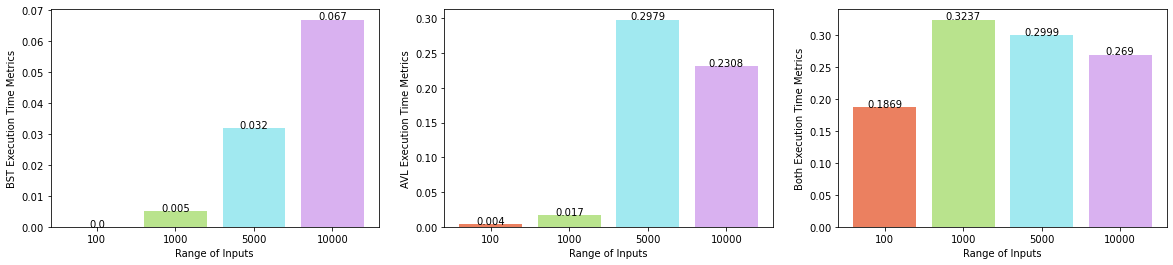

In [136]:
import matplotlib.pyplot as plt

##inputs = [1000,10000,100000]
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
xvalues = [str(i) for i in inputs]

fig = plt.figure(figsize=(20,4))
ax1 = plt.subplot(1, 3, 1)
color = ["#eb8060", "#b9e38d", "#a1e9f0", "#d9b1f0"]
ax1.bar(xvalues, Bst_Execution_Time, color = color)
addlabels(xvalues, Bst_Execution_Time)
plt.ylabel('BST Execution Time Metrics')
plt.xlabel('Range of Inputs')

ax2 = plt.subplot(1, 3, 2)
ax2.bar(xvalues, Avl_Execution_Time, color = color)
addlabels(xvalues, Avl_Execution_Time)
plt.ylabel('AVL Execution Time Metrics')
plt.xlabel('Range of Inputs')

ax3 = plt.subplot(1, 3, 3 )
ax3.bar(xvalues, Both_Execution_Time, color = color)
addlabels(xvalues, Both_Execution_Time)
plt.ylabel('Both Execution Time Metrics')
plt.xlabel('Range of Inputs')

    
plt.show()


<center><h3  style="color:MediumSeaGreen;" >Independent  Comparision  Of CPU Usages For  BST   AVL  Concurrent Process</h3></center>

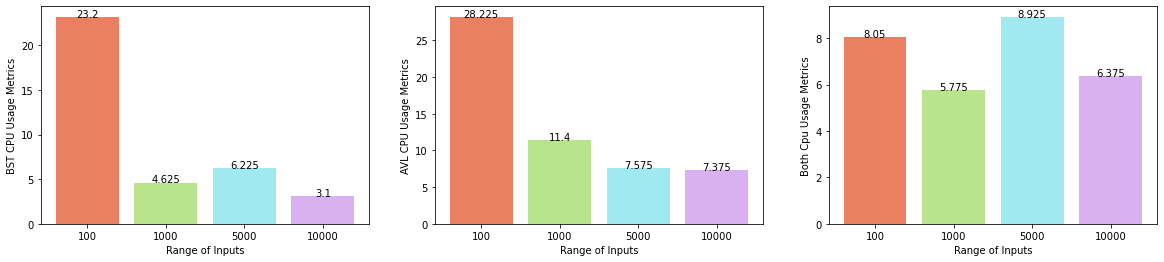

In [137]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
xvalues = [str(i) for i in inputs]
fig = plt.figure(figsize=(20,4))

color = ["#eb8060", "#b9e38d", "#a1e9f0", "#d9b1f0"]

ax1 = plt.subplot(1, 3, 1)
ax1.bar(xvalues, Bst_cpu, color = color)
addlabels(xvalues, Bst_cpu)
plt.ylabel('BST CPU Usage Metrics')
plt.xlabel('Range of Inputs')

ax2 = plt.subplot(1, 3, 2)
ax2.bar(xvalues, Avl_cpu, color = color)
addlabels(xvalues, Avl_cpu)
plt.ylabel('AVL CPU Usage Metrics')
plt.xlabel('Range of Inputs')

ax3 = plt.subplot(1, 3, 3)
ax3.bar(xvalues, Both_cpu, color = color)
addlabels(xvalues, Both_cpu)
plt.ylabel('Both Cpu Usage Metrics')
plt.xlabel('Range of Inputs')

plt.show()


<center><h3  style="color:MediumSeaGreen;" >Independent  Comparision  Of Memory Usages For  BST   AVL  Concurrent Process</h3></center>

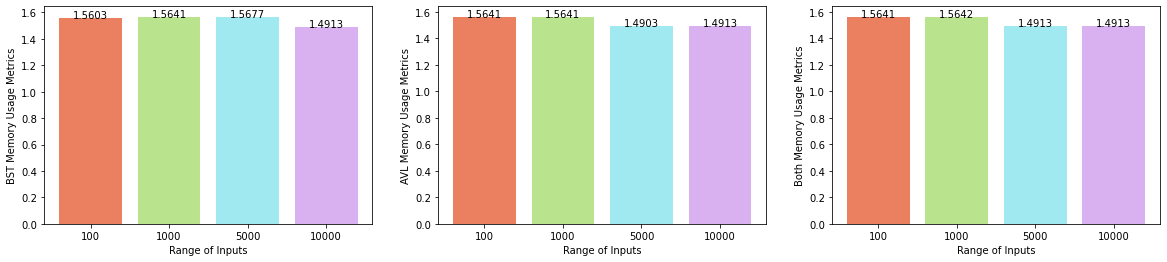

In [138]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
xvalues = [str(i) for i in inputs]

fig = plt.figure(figsize=(20,4))
color = ["#eb8060", "#b9e38d", "#a1e9f0", "#d9b1f0"] 

ax1 = plt.subplot(1, 3, 1)
ax1.bar(xvalues, Bst_memory, color = color)
addlabels(xvalues, Bst_memory)
plt.ylabel('BST Memory Usage Metrics')
plt.xlabel('Range of Inputs')

ax2 = plt.subplot(1, 3, 2)
ax2.bar(xvalues, Avl_memory, color = color)
addlabels(xvalues, Avl_memory)
plt.ylabel('AVL Memory Usage Metrics')
plt.xlabel('Range of Inputs')

ax3 = plt.subplot(1, 3, 3)
ax3.bar(xvalues, Both_memory, color = color)
addlabels(xvalues, Both_memory)
plt.ylabel('Both Memory Usage Metrics')
plt.xlabel('Range of Inputs')

plt.show()

<center><h3  style="color:MediumSeaGreen;" >Independent  Comparision  Of Disk Usage For  BST   AVL  Concurrent Process</h3></center>

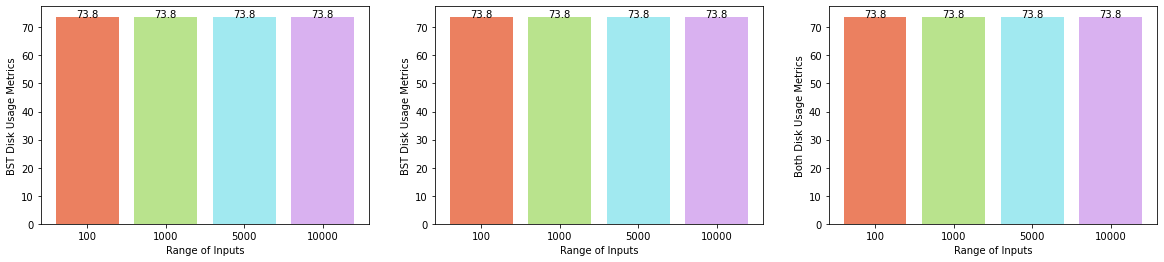

In [139]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
xvalues = [str(i) for i in inputs]
color = ["#eb8060", "#b9e38d", "#a1e9f0", "#d9b1f0"] 
fig = plt.figure(figsize=(20,4))

ax1 = plt.subplot(1, 3, 1)
ax1.bar(xvalues, Bst_disk_percent, color = color)
addlabels(xvalues, Bst_disk_percent)
plt.ylabel('BST Disk Usage Metrics')
plt.xlabel('Range of Inputs')

ax2 = plt.subplot(1, 3, 2)
ax2.bar(xvalues, Bst_disk_percent, color = color)
addlabels(xvalues, Bst_disk_percent)
plt.ylabel('BST Disk Usage Metrics')
plt.xlabel('Range of Inputs')

ax3 = plt.subplot(1, 3, 3)
ax3.bar(xvalues, Both_disk_percent, color = color)
addlabels(xvalues, Both_disk_percent)
plt.ylabel('Both Disk Usage Metrics')
plt.xlabel('Range of Inputs')

plt.show()

<center><h3  style="color:MediumSeaGreen;" >Independent  Comparision  Of RSS For  BST   AVL  Concurrent Process</h3></center>

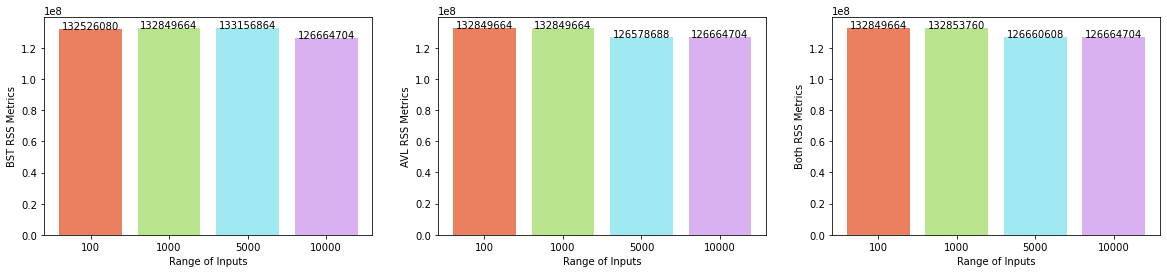

In [140]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
xvalues = [str(i) for i in inputs]
color = ["#eb8060", "#b9e38d", "#a1e9f0", "#d9b1f0"]
fig = plt.figure(figsize=(20,4))

ax1 = plt.subplot(1, 3, 1)
ax1.bar(xvalues, Bst_rss, color = color)
addlabels(xvalues, Bst_rss)
plt.ylabel('BST RSS Metrics')
plt.xlabel('Range of Inputs')

ax2 = plt.subplot(1, 3, 2)
ax2.bar(xvalues, Avl_rss, color = color)
addlabels(xvalues, Avl_rss)
plt.ylabel('AVL RSS Metrics')
plt.xlabel('Range of Inputs')

ax3 = plt.subplot(1, 3, 3)
ax3.bar(xvalues, Both_rss, color = color)
addlabels(xvalues, Both_rss)
plt.ylabel('Both RSS Metrics')
plt.xlabel('Range of Inputs')

plt.show()

<center><h3  style="color:MediumSeaGreen;" >Independent  Comparision  Of VMS For  BST   AVL  Concurrent Process</h3></center>

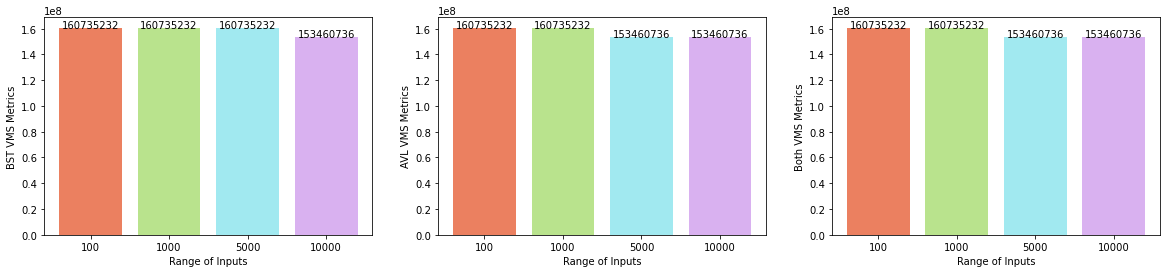

In [141]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
xvalues = [str(i) for i in inputs]
color = ["#eb8060", "#b9e38d", "#a1e9f0", "#d9b1f0"]
fig = plt.figure(figsize=(20,4))

ax1 = plt.subplot(1, 3, 1)
ax1.bar(xvalues, Bst_vms, color = color)
addlabels(xvalues, Bst_vms)
plt.ylabel('BST VMS Metrics')
plt.xlabel('Range of Inputs')

ax2 = plt.subplot(1, 3, 2)
ax2.bar(xvalues, Avl_vms, color = color)
addlabels(xvalues, Avl_vms)
plt.ylabel('AVL VMS Metrics')
plt.xlabel('Range of Inputs')

ax3 = plt.subplot(1, 3, 3)
ax3.bar(xvalues, Both_vms, color = color)
addlabels(xvalues, Both_vms)
plt.ylabel('Both VMS Metrics')
plt.xlabel('Range of Inputs')

plt.show()

<center><h3  style="color:MediumSeaGreen;" >Independent  Comparision  Of Number of Page Faults For  BST   AVL  Concurrent Process</h3></center>

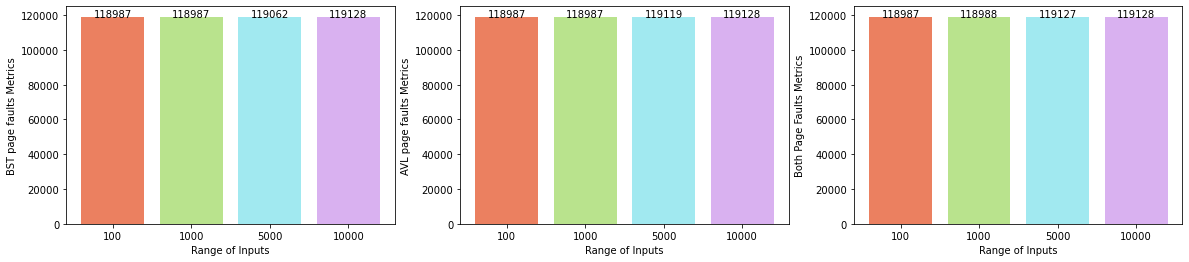

In [142]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
xvalues = [str(i) for i in inputs]
color = ["#eb8060", "#b9e38d", "#a1e9f0", "#d9b1f0"]
fig = plt.figure(figsize=(20,4))

ax1 = plt.subplot(1, 3, 1)
ax1.bar(xvalues, Bst_faults, color = color)
addlabels(xvalues, Bst_faults)
plt.ylabel('BST page faults Metrics')
plt.xlabel('Range of Inputs')

ax2 = plt.subplot(1, 3, 2)
ax2.bar(xvalues, Avl_faults, color = color)
addlabels(xvalues, Avl_faults)
plt.ylabel('AVL page faults Metrics')
plt.xlabel('Range of Inputs')

ax3 = plt.subplot(1, 3, 3)
ax3.bar(xvalues, Both_faults, color = color)
addlabels(xvalues, Both_faults)
plt.ylabel('Both Page Faults Metrics')
plt.xlabel('Range of Inputs')

plt.show()

<center><h3  style="color:MediumSeaGreen;" >Combined Comparision  Of Execution Times For  BST   AVL  Concurrent Process</h3></center>

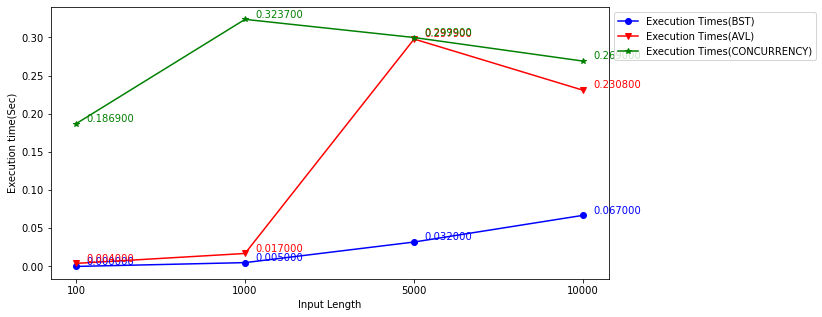

BST EXECUTION TIMES [0.0, 0.005, 0.032, 0.067]
AVL EXECUTION TIMES [0.004, 0.017, 0.2979, 0.2308]
CONCURRENT EXECUTION TIMES [0.1869, 0.3237, 0.2999, 0.269]


In [143]:
import numpy as np

fig = plt.figure(figsize=(10,5))

plt.plot(xvalues, Bst_Execution_Time, color='blue', marker='o', label="Execution Times(BST)")
for x, y in zip(xvalues, Bst_Execution_Time):
    label = "{:.6f}".format(y)
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(10,10), color='blue', ha='left', va='top')

plt.plot(xvalues, Avl_Execution_Time, color='red', marker='v', label="Execution Times(AVL)")
for x, y in zip(xvalues, Avl_Execution_Time):
    label = "{:.6f}".format(y)
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(10,10), color='red', ha='left', va='top')

plt.plot(xvalues, Both_Execution_Time, color='green', marker='*', label="Execution Times(CONCURRENCY)")
for x, y in zip(xvalues, Both_Execution_Time):
    label = "{:.6f}".format(y)
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(10,10), color='green', ha='left', va='top')

plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xlabel("Input Length")
plt.ylabel("Execution time(Sec)")
plt.show()


print("BST EXECUTION TIMES" ,           Bst_Execution_Time)
print("AVL EXECUTION TIMES" ,           Avl_Execution_Time)
print("CONCURRENT EXECUTION TIMES",     Both_Execution_Time)

<center><h3  style="color:MediumSeaGreen;" >Analysis Of Execution Times For  BST   AVL  Concurrent Process  </h3></center>

<p>From the Above Graph, the Execution times of BST is way lesser than Execution Times of AVL for different range of input sizes , This is justified as AVL employs rotations(right/left) to balance the tree every time and BST would not balance the tree. The same trend is observed for different range of inputs. Concurrent process takes higher times as both processes runs parallelly taking higher time than BST and AVL combined </p>

<center><h3  style="color:MediumSeaGreen;" >Combined Comparision  Of CPU Usages For  BST   AVL  Concurrent Process</h3></center>

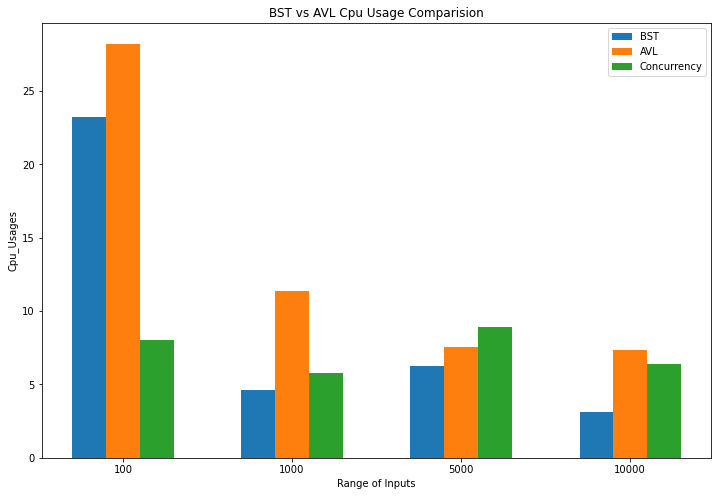

BST CPU USAGES [23.2, 4.625, 6.225, 3.1]
AVL CPU USAGES [28.225, 11.4, 7.575, 7.375]
CONCURRENT CPU USAGES [8.05, 5.775, 8.925, 6.375]


In [144]:
import numpy as np

x_axis = np.arange(len(xvalues))
fig = plt.figure(figsize=(12,8))
plt.bar(x_axis - 0.2, Bst_cpu, 0.2, label="BST")
plt.bar(x_axis, Avl_cpu, 0.2, label="AVL")
plt.bar(x_axis + 0.2, Both_cpu, 0.2, label="Concurrency")

plt.xticks(x_axis, xvalues)
plt.xlabel("Range of Inputs")
plt.ylabel("Cpu_Usages")
plt.title("BST vs AVL Cpu Usage Comparision")
plt.legend()
plt.show()


print("BST CPU USAGES" ,          Bst_cpu)
print("AVL CPU USAGES"  ,         Avl_cpu)
print("CONCURRENT CPU USAGES" ,   Both_cpu)

<center><h3  style="color:MediumSeaGreen;" >Analysis Of CPU USAGE Times For  BST   AVL  Concurrent Process  </h3></center>

<p>From the above graph CPU Usage Times for AVL is higher than BST as AVL rotates the tree for every insertion or deletion and BST would not, and AVL would use more CPU time. From the graph, concurrencies are taking little lesser CPU times as it would use CPU more efficiently to handle both the processes parallelly</p>

<center><h3  style="color:MediumSeaGreen;" >Combined Comparision  Of Memory Usages For  BST   AVL  Concurrent Process</h3></center>

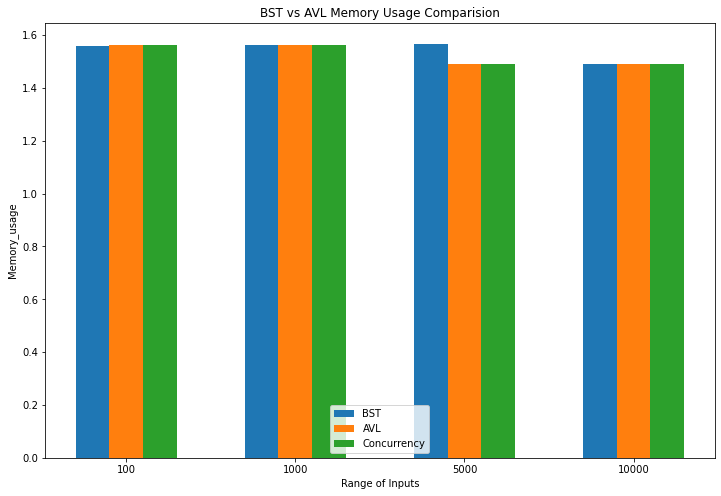

BST MEMORY USAGES [1.5603, 1.5641, 1.5677, 1.4913]
AVL MEMORY USAGES [1.5641, 1.5641, 1.4903, 1.4913]
CONCURRENT MEMORY USAGES [1.5641, 1.5642, 1.4913, 1.4913]


In [150]:
import numpy as np

x_axis = np.arange(len(xvalues))
fig = plt.figure(figsize=(12,8))
plt.bar(x_axis - 0.2, Bst_memory, 0.2, label="BST")
plt.bar(x_axis, Avl_memory, 0.2, label="AVL")
plt.bar(x_axis + 0.2, Both_memory, 0.2, label="Concurrency")

plt.xticks(x_axis, xvalues)
plt.xlabel("Range of Inputs")
plt.ylabel("Memory_usage")
plt.title("BST vs AVL Memory Usage Comparision")
plt.legend()
plt.show()


print("BST MEMORY USAGES" ,        Bst_memory)
print("AVL MEMORY USAGES" ,        Avl_memory)
print("CONCURRENT MEMORY USAGES",  Both_memory)

<center><h3  style="color:MediumSeaGreen;" >Analysis Of Memory Usage Times For  BST   AVL  Concurrent Process  </h3></center>

<p>The above graph shows that there is only slight variation in the memory usage for BST or AVL processes. Memory Usages of Concurrent process  are almost the same as that of AVL and BST processes, but on a slight higher side</p>

<center><h3  style="color:MediumSeaGreen;" >Combined Comparision  Of Disk Usage For  BST   AVL  Concurrent Process</h3></center>

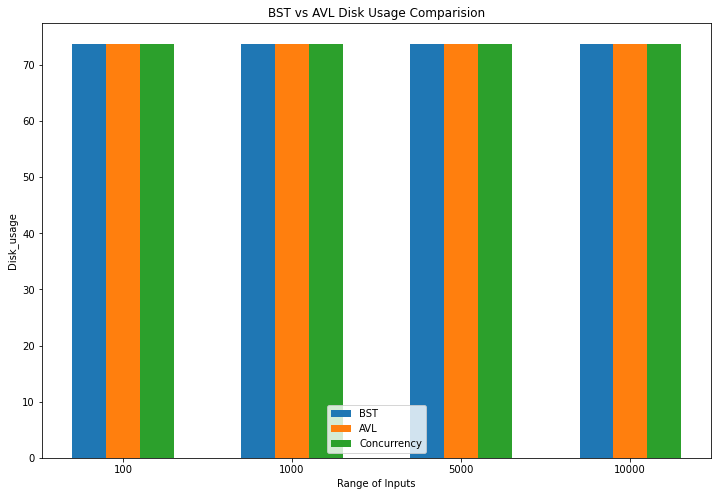

BST DISK USAGES [73.8, 73.8, 73.8, 73.8]
AVL DISK USAGES [73.8, 73.8, 73.8, 73.8]
CONCURRENT DISK USAGES [73.8, 73.8, 73.8, 73.8]


In [151]:
import numpy as np

x_axis = np.arange(len(xvalues))
fig = plt.figure(figsize=(12,8))
plt.bar(x_axis - 0.2, Bst_disk_percent, 0.2, label="BST")
plt.bar(x_axis, Avl_disk_percent, 0.2, label="AVL")
plt.bar(x_axis + 0.2, Both_disk_percent, 0.2, label="Concurrency")

plt.xticks(x_axis, xvalues)
plt.xlabel("Range of Inputs")
plt.ylabel("Disk_usage")
plt.title("BST vs AVL Disk Usage Comparision")
plt.legend()
plt.show()


print("BST DISK USAGES" ,          Bst_disk_percent)
print("AVL DISK USAGES" ,          Avl_disk_percent)
print("CONCURRENT DISK USAGES" ,   Both_disk_percent)

<center><h3  style="color:MediumSeaGreen;" >Analysis Of  Disk  Usages For  BST   AVL  Concurrent Process  </h3></center>

<p>The above graph shows equal usage for two algorithms(BST and AVL) as these algorithms dont use disk and only use main memory.</p>

<center><h3  style="color:MediumSeaGreen;" >Combined Comparision  Of RSS For  BST   AVL  Concurrent Process</h3></center>

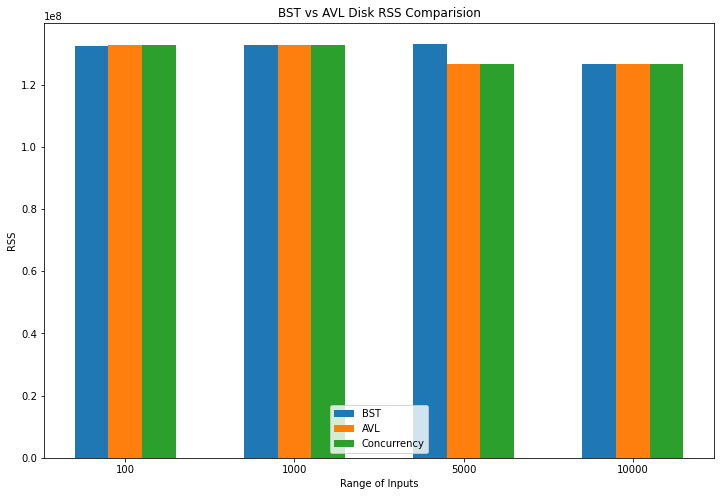

BST RSS [132526080, 132849664, 133156864, 126664704]
AVL RSS [132849664, 132849664, 126578688, 126664704]
CONCURRENT RSS [132849664, 132853760, 126660608, 126664704]


In [152]:
import numpy as np

x_axis = np.arange(len(xvalues))
fig = plt.figure(figsize=(12,8))
plt.bar(x_axis - 0.2, Bst_rss, 0.2, label="BST")
plt.bar(x_axis, Avl_rss, 0.2, label="AVL")
plt.bar(x_axis + 0.2, Both_rss, 0.2, label="Concurrency")

plt.xticks(x_axis, xvalues)
plt.xlabel("Range of Inputs")
plt.ylabel("RSS")
plt.title("BST vs AVL Disk RSS Comparision")
plt.legend()
plt.show()


print("BST RSS" ,          Bst_rss)
print("AVL RSS",           Avl_rss)
print("CONCURRENT RSS" ,   Both_rss)

<center><h3  style="color:MediumSeaGreen;" >Analysis Of  RSS For  BST   AVL  Concurrent Process  </h3></center>

<p>The above graph shows that AVL has higher RSS values when compared with BST and concurrent process is on slightly higher side when compared with both BST and AVL , across different range of inputs</p>

<center><h3  style="color:MediumSeaGreen;" >Combined Comparision  Of VMS For  BST   AVL  Concurrent Process</h3></center>

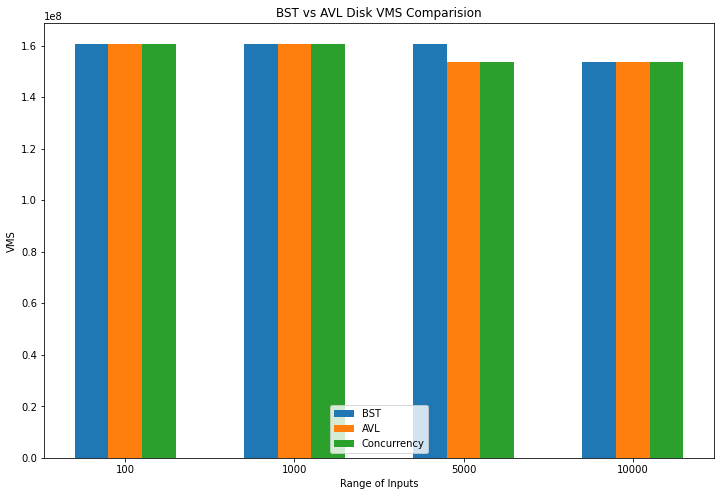

BST VMS [160735232, 160735232, 160735232, 153460736]
AVL VMS [160735232, 160735232, 153460736, 153460736]
CONCURRENT VMS [160735232, 160735232, 153460736, 153460736]


In [153]:
import numpy as np

x_axis = np.arange(len(xvalues))
fig = plt.figure(figsize=(12,8))
plt.bar(x_axis - 0.2, Bst_vms, 0.2, label="BST")
plt.bar(x_axis, Avl_vms, 0.2, label="AVL")
plt.bar(x_axis + 0.2, Both_vms, 0.2, label="Concurrency")

plt.xticks(x_axis, xvalues)
plt.xlabel("Range of Inputs")
plt.ylabel("VMS")
plt.title("BST vs AVL Disk VMS Comparision")
plt.legend()
plt.show()


print("BST VMS"  ,   Bst_vms)
print("AVL VMS"   ,  Avl_vms)
print("CONCURRENT VMS" , Both_vms)

<center><h3  style="color:MediumSeaGreen;" >Analysis Of VMS For  BST   AVL  Concurrent Process  </h3></center>

<p>The above graph shows that BST , AVL and Concurrent processes have the same Virtual memory usage</p>

<center><h3  style="color:MediumSeaGreen;" >Combined Comparision  Of Number of Page Faults For  BST   AVL  Concurrent Process</h3></center>

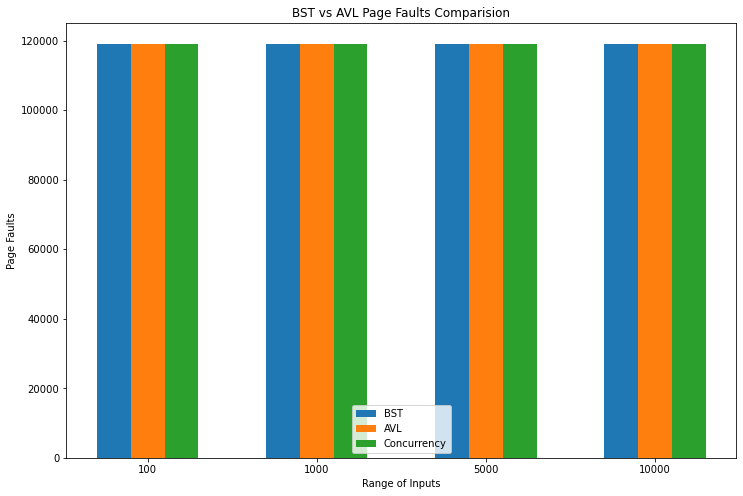

BST PAGE FAULTS [118987, 118987, 119062, 119128]
AVL PAGE FAULTS [118987, 118987, 119119, 119128]
CONCURRENT PAGE FAULTS [118987, 118988, 119127, 119128]


In [154]:
import numpy as np

x_axis = np.arange(len(xvalues))
fig = plt.figure(figsize=(12,8))
plt.bar(x_axis - 0.2, Bst_faults, 0.2, label="BST")
plt.bar(x_axis, Avl_faults, 0.2, label="AVL")
plt.bar(x_axis + 0.2, Both_faults, 0.2, label="Concurrency")

plt.xticks(x_axis, xvalues)
plt.xlabel("Range of Inputs")
plt.ylabel("Page Faults")
plt.title("BST vs AVL Page Faults Comparision")
plt.legend()
plt.show()


print("BST PAGE FAULTS" ,  Bst_faults)
print("AVL PAGE FAULTS" ,  Avl_faults)
print("CONCURRENT PAGE FAULTS",  Both_faults)

<center><h3  style="color:MediumSeaGreen;" >Analysis Of Page Faults For  BST   AVL  Concurrent Process  </h3></center>

<p>The above graph shows that the number of page faults is the same for BST and AVL , with concurrent process on a slightly higher side</p>